In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
CHUTES_LADDERS = {1:38, 4:14, 9:31, 16:6, 21:42, 28:84, 36:44,
                  47:26, 49:11, 51:67, 56:53, 62:19, 64:60,
                  71:91, 80:100, 87:24, 93:73, 95:75, 98:78}

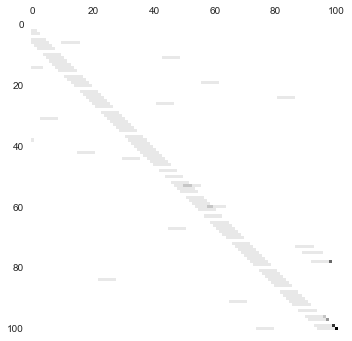

In [2]:

def cl_markov_matrix(max_roll=6, jump_at_end=True):
    # Create the basic transition matrix:
    mat = np.zeros((101, 101))
    for i in range(101):
        mat[i + 1:i + 1 + max_roll, i] = 1. / max_roll
    mat[range(101), range(101)] += 1 - mat.sum(0)

    # account for the presence of chutes and ladders
    # we'll do this via  another transition matrix
    cl_mat = np.zeros((101, 101))
    ind = [CHUTES_LADDERS.get(i, i) for i in range(101)]
    cl_mat[ind, range(101)] = 1
    if jump_at_end:
        return cl_mat @ mat
    else:
        return mat @ cl_mat

mat = cl_markov_matrix()
plt.matshow(mat)
plt.grid(False)

In [3]:
np.set_printoptions(suppress=True, precision=2)

v_0 = [1, *np.zeros(100)]
mat @ v_0

array([0.  , 0.  , 0.17, 0.17, 0.  , 0.17, 0.17, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.17, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  ])

In [4]:
def cl_probability(n):
    """Compute the state vector after n turns"""
    mat = cl_markov_matrix()
    v_0 = [1, *np.zeros(100)]
    return np.linalg.matrix_power(mat, n) @ v_0

In [5]:
from matplotlib import colors

# Make a blue colorbar with increasing opacity
c = np.zeros((100, 4))
c[:, -1] = np.linspace(0, 1, 100)  # transparency gradient
c[:, 2] = 0.5  # make the map dark blue
TransparencyMap = colors.ListedColormap(c)


def show_board(turn):
    fig, ax = plt.subplots()
    board = plt.imread('ChutesAndLadders-board.gif')
    
    # Compute & reshape the probability vector
    prob = cl_probability(turn)
    prob = prob[1:].reshape(10, 10)[::-1]
    prob[::2] = prob[::2, ::-1]
    
    # Show result over the image of the board
    ax.imshow(board, alpha=0.8)
    im = ax.imshow(prob, extent=[10, 800, 810, 10],
                   norm=colors.LogNorm(vmin=1E-3, vmax=1),
                   cmap=TransparencyMap)
    fig.colorbar(im, ax=ax, label='Fraction of games')
    ax.axis('off')
    ax.set_title(f"Turn {turn}")
    
    return fig

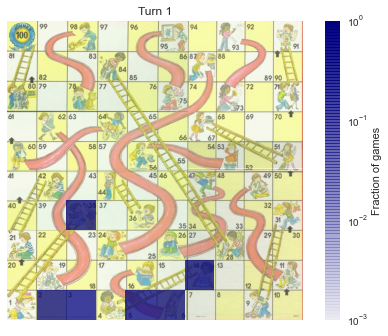

In [6]:
show_board(1);

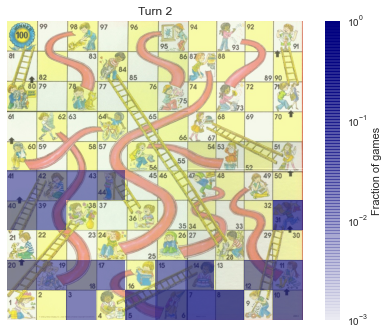

In [7]:
show_board(2);

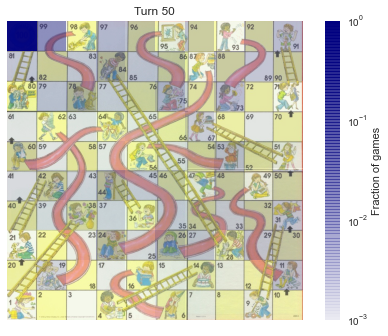

In [8]:
show_board(50);